In [1]:
import warnings
warnings.filterwarnings("ignore")

# Домашнє завдання: Побудова класифікатора сентименту на основі набору даних Tweet Sentiment Extraction

**Мета:** Провести аналіз набору даних, виконати векторизацію текстових даних за допомогою методів bag-of-words та TF-IDF, порівняти їх, побудувати класифікатор та провести аналіз помилок.

**Набір даних:**
Дані беремо з цього змагання на Kaggle: https://www.kaggle.com/competitions/tweet-sentiment-extraction/data?select=train.csv

Оригінальне змагання має дещо іншу задачу, але ми будемо поки будувати саме класифікатор.

### Завдання 1. Завантаження та ознайомлення з набором даних

- Завантажте набір даних `train.csv` з посилання та ознайомтеся з його структурою.
- Виведіть перші 5 рядків та основну статистику: кількість записів, типи колонок, кількість пропущених значень.
- Видаліть записи, в яких є пропущені значення.



In [2]:
import pandas as pd

tweets_df = pd.read_csv('csv/tweet_sentiment_train.csv.zip', compression='zip')

tweets_df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [3]:
tweets_df.describe()

,textID,text,selected_text,sentiment
count,27481,27480,27480,27481
unique,27481,27480,22463,3
top,cb774db0d1,"I`d have responded, if I were going",good,neutral
freq,1,1,199,11118


In [4]:
tweets_df.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [5]:
tweets_df = tweets_df.dropna()
tweets_df.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

### Завдання 2. Exploratory Data Analysis

- Проведіть аналіз кількості класів та розподілу міток. Класи знаходяться в колонці `sentiment`.
- Візуалізуйте розподіл довжин текстів в символах та зробіть висновок про довжини постів: якої довжини постів найбільше, що бачите з розподілу?



sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64


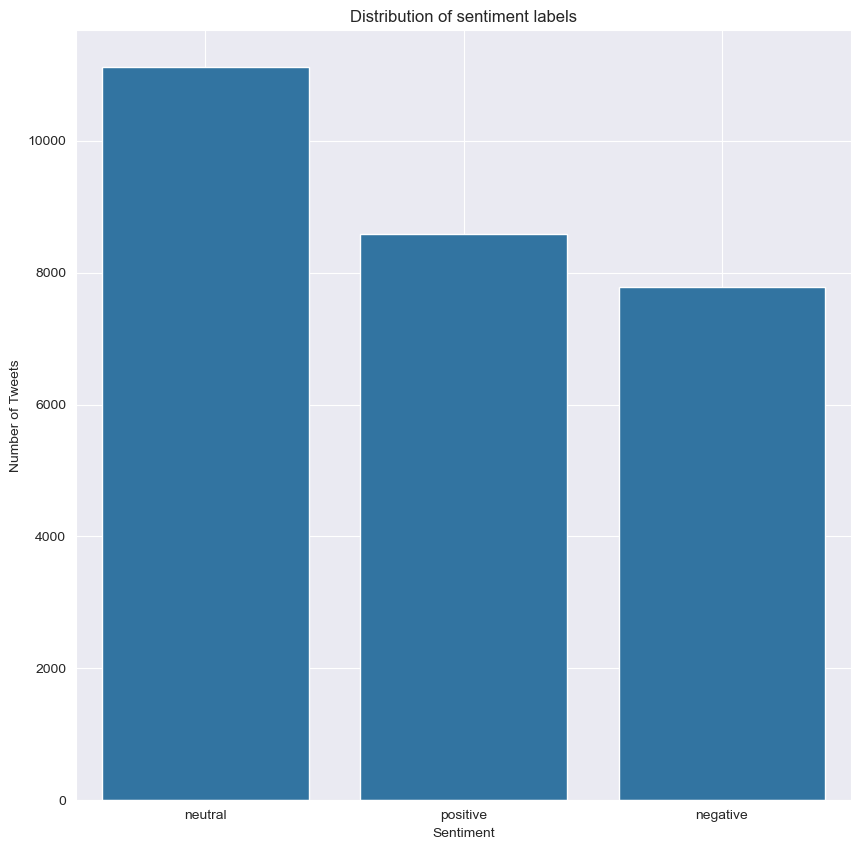

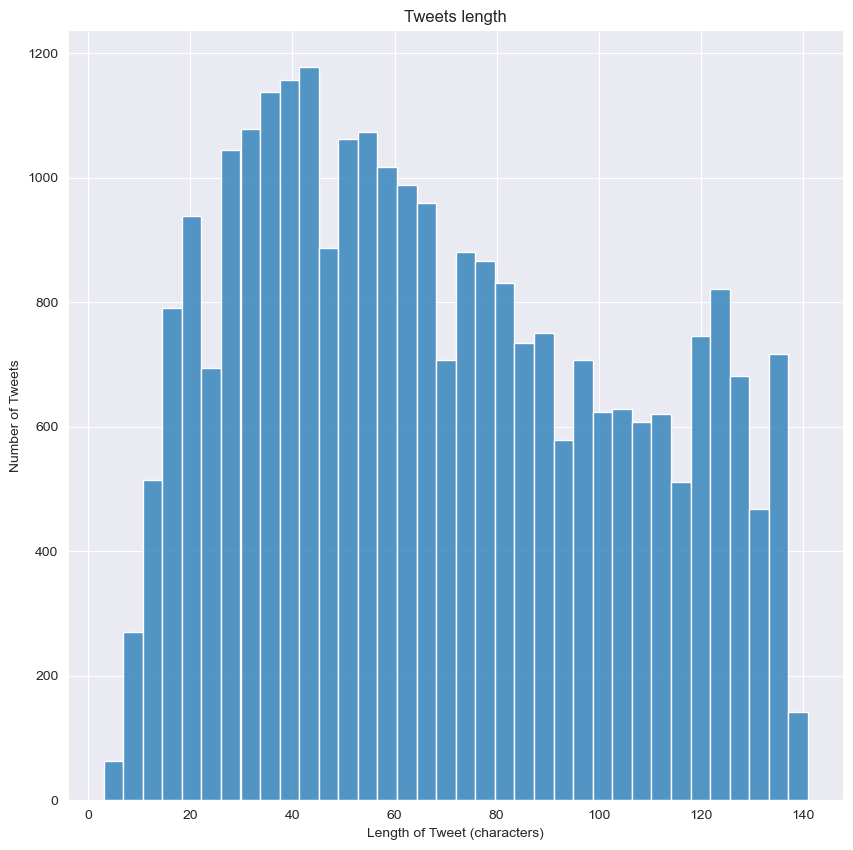

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#Labels discounts
label_counts = tweets_df['sentiment'].value_counts()
print(label_counts)


#Labels discounts plot
plt.figure(figsize = (10,10))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Distribution of sentiment labels")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.grid(True)
plt.show()

#Create new column - tweet text length
tweets_df['text_length'] = tweets_df['text'].apply(len)

plt.figure(figsize = (10,10))
sns.histplot(tweets_df['text_length'])
plt.title("Tweets length")
plt.xlabel("Length of Tweet (characters)")
plt.ylabel("Number of Tweets")
plt.grid(True)
plt.show()


#### As we can see, the most frequent sentiment label of tweets is neutral.

#### As for lengths of tweets, they are distributed almost normally and the most popular tweet length is around 40 symbols.

### Завдання 3. Попередня обробка текстових даних та векторизація з bag of words


Наша задача тут отримати вектори методом bag of words колонки `text`, виконавши попередню обробку тексту.
Попередня обробка має включати
- видалення stopwords необхідної мови
- токенізація (розбиття текстів на фрагменти по 1 слову)
- стеммінг слів зі `SnowballStemmer`.
- самостійно задайте кількість слів в словнику для `sklearn.feature_extraction.text.CountVectorizer`. Можливо для цього доведеться виконати додатковий аналіз.

Ви також можете додати сюди додаткові методи очистки текстів, наприклад, видалення деяких символів чи груп символів, якщо в процесі роботи побачите, що хочете щось видалити.

Напишіть код аби виконати це завдання. Перед цим рекомендую детально ознайомитись з тим, що робить обʼєкт `sklearn.feature_extraction.text.CountVectorizer` за замовченням.

Це завдання можна виконати двома способами - один - максимально подібно до того, як ми це робили в лекції, другий - дещо інакше перегрупувавши етапи обробки тексту.




In [33]:
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

#Download nltk resources
import nltk
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)

#Choose language for stopwords and stemming
language = 'english'
stemmer = SnowballStemmer(language)
stop_words = set(stopwords.words(language))

#Define custom tokenizer for preprocessing
def custom_tokenizer(text):
    text = text.lower()                                     # 1. Lowercase
    text = re.sub(r'[^\w\s]', '', text)                     # 2. Remove punctuation
    tokens = word_tokenize(text)                            # 3. Tokenize text
    tokens = [w for w in tokens if not w.isdigit() and w not in stop_words]     # 4. Remove stopwords
    stems = [stemmer.stem(w) for w in tokens]               # 5. Stemming
    return stems

# Initialize CountVectorizer with your custom tokenizer
vectorizer = CountVectorizer(
    tokenizer=custom_tokenizer,
    lowercase=False                 # already done that in custom_tokenizer
    )

# Apply vectorization to 'text' column
X_bow = vectorizer.fit_transform(tweets_df['text'])

# Convert to DataFrame (optional, to see the word frequencies)
X_bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

X_bow_df.head()

,079ï½,07i,0_o,0f,0kenjoy,0n,0rpm,0ut,10000th,1000th,...,ï½stupidityï½,ï½tearï½,ï½timo,ï½ureo,ï½whi,ï½whyyi,ï½you,ï½ï½,ï½ï½h,ï½ï½ï½ï½
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Завдання 4. Побудова класифікатора

- Розділіть індекси даних на навчальний та тестовий набори в обраному співвівдношенні. Використовуючи отримані індекси сфомуйте набори для тренування класифікатора `X_train_bow, X_test_bow, y_train, y_test`.
- Навчіть класифікатор (наприклад, Logistic Regression, Decision Tree або один з алгоритмів бустингу) на даних, векторизованих методом bag-of-words. Спробуйте кілька моделей і оберіть найбільш точну :)
- Виведіть інформацію, яка дає можливість оцінити якість класифікації.
- Оцініть якість фінальної класифікації: вона хороша чи не дуже?



In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y = tweets_df['sentiment']      # sentiment column
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow_df, y, test_size=0.2, random_state=42)

In [11]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_bow, y_train)
y_pred_lr = lr.predict(X_test_bow)

In [12]:
tree = DecisionTreeClassifier()
tree.fit(X_train_bow, y_train)
y_pred_tree = tree.predict(X_test_bow)

In [20]:
hgb = HistGradientBoostingClassifier(
    max_iter=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)

hgb.fit(X_train_bow.values, y_train)     # Use .values
y_pred_hgb = hgb.predict(X_test_bow.values)

In [38]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluation for model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print("\nClassification report:", classification_report(y_true, y_pred))
    print(f"Confusion matrix:\n{confusion_matrix(y_true, y_pred)}")

evaluate_model(y_test, y_pred_tree, "Logistic Regression\n")
evaluate_model(y_test, y_pred_tree, "Decision Tree\n")
evaluate_model(y_test, y_pred_hgb, "Histogram Gradient Boosting Classifier\n")


Evaluation for model: Logistic Regression

Accuracy: 0.6590247452692868

Classification report:               precision    recall  f1-score   support

    negative       0.63      0.62      0.62      1572
     neutral       0.65      0.65      0.65      2236
    positive       0.71      0.70      0.70      1688

    accuracy                           0.66      5496
   macro avg       0.66      0.66      0.66      5496
weighted avg       0.66      0.66      0.66      5496

Confusion matrix:
[[ 980  452  140]
 [ 426 1454  356]
 [ 158  342 1188]]

Evaluation for model: Decision Tree

Accuracy: 0.6590247452692868

Classification report:               precision    recall  f1-score   support

    negative       0.63      0.62      0.62      1572
     neutral       0.65      0.65      0.65      2236
    positive       0.71      0.70      0.70      1688

    accuracy                           0.66      5496
   macro avg       0.66      0.66      0.66      5496
weighted avg       0.66      0.6

#### As we can see, the best result were shown using Histogram Gradient Boosting Classifier

### Завдання 5. Аналіз впливовості слів в отриманого класифікатора

- Для обраної вами моделі проведіть аналіз важливості слів (ознак): які слова (токени) найбільше впливають для визначення сентименту? Чи це логічно на ваш погляд, що саме ці символи впливають найбільше/найменще?


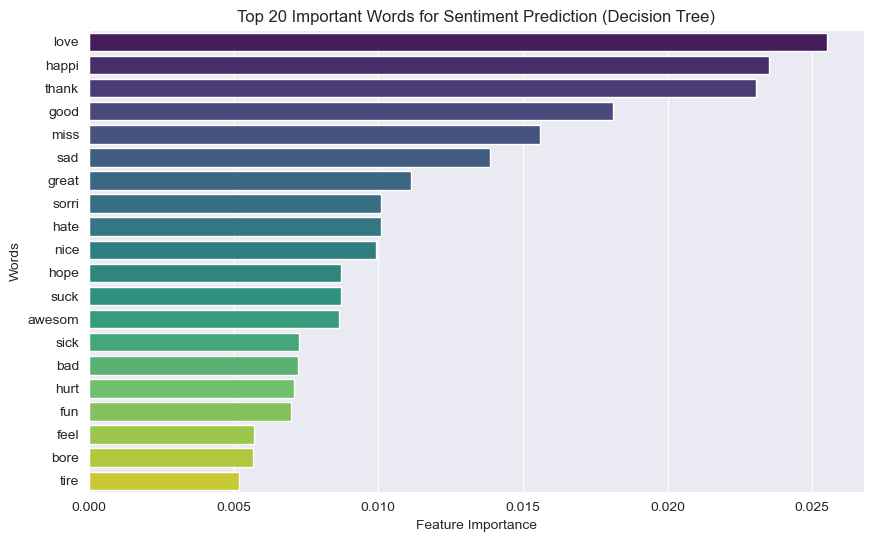

In [34]:
# Extract importances
importances = tree.feature_importances_

# Create DataFrame with feature names
feature_importances_df = pd.DataFrame({
    'feature': vectorizer.get_feature_names_out(),
    'importance': importances
})

# Sort features by importance
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Show top 20 most important words
feature_importances_df.head(20)

import matplotlib.pyplot as plt
import seaborn as sns

top_n = 20
plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_importances_df.head(top_n),
    x='importance',
    y='feature',
    palette='viridis'
)
plt.title(f"Top {top_n} Important Words for Sentiment Prediction (Decision Tree)")
plt.xlabel("Feature Importance")
plt.ylabel("Words")
plt.show()

I would agree that word 'love' has the biggest importance on sentiment.

### Завдання 6. Векторизація текстів з допомогою TF-IDF. Тренування класифікатора, аналіз точності і впливовості слів.

- Проведіть векторизацію текстів з векторизатором TfidfVectorizer. Реалізуйте векторизацію так, аби препроцесинг включав всі ті самі кроки, що і в випадку використання векторизації Bag of Words.

- Натренуйте той самий класифікатор на TF-IDF векторах, виконавши розбивку набору даних на train, test так, аби в трейні були всі ті самі записи, що і були в попередньому завданні (це важливо для порівняння результатів).

- Проаналізуйте якість класифікації вивівши потрібні для цього метрики. Чи стала якість класифікації кращою?

- Які токени найбільше впливають на результат при тренуваннні класифікатора з TF-IDF векторами? Порівняйте з найважливішими токенами при Bag of Words векторизації. Яку векторизацію ви б обрали для фінальної імплементації рішення? Обґрунтуйте свій вибір.



In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    tokenizer=custom_tokenizer,
    max_features=5000,        # (same as Bag-of-Words)
    lowercase=False           # because already lowercased in tokenizer
)

X_tfidf = tfidf_vectorizer.fit_transform(tweets_df['text'])

# Use the same train_test_split we used for Bag of Words:
# (make sure the train indices are the same)
# Now your TF-IDF train and test are aligned with BoW
X_train_tfidf = X_tfidf[X_train_bow.index]
X_test_tfidf = X_tfidf[X_test_bow.index]

tree_tfidf = DecisionTreeClassifier(random_state=42)
tree_tfidf.fit(X_train_tfidf, y_train)

y_pred_tree_tfidf = tree_tfidf.predict(X_test_tfidf)

evaluate_model(y_test, y_pred_tree_tfidf, "Decision Tree with TF-IDF")

importances_tfidf = tree_tfidf.feature_importances_

feature_importances_tfidf_df = pd.DataFrame({
    'feature': tfidf_vectorizer.get_feature_names_out(),
    'importance': importances_tfidf
}).sort_values(by='importance', ascending=False)

feature_importances_tfidf_df.head(20)

Evaluation for model: Decision Tree with TF-IDF
Accuracy: 0.6530203784570596

Classification report:               precision    recall  f1-score   support

    negative       0.62      0.60      0.61      1572
     neutral       0.64      0.64      0.64      2236
    positive       0.69      0.72      0.71      1688

    accuracy                           0.65      5496
   macro avg       0.65      0.65      0.65      5496
weighted avg       0.65      0.65      0.65      5496

Confusion matrix:
[[ 945  469  158]
 [ 431 1421  384]
 [ 138  327 1223]]


,feature,importance
2626,love,0.026922
1987,happi,0.024570
4356,thank,0.023954
1877,good,0.020649
2843,miss,0.016955
3701,sad,0.013981
1915,great,0.011855
2120,hope,0.010846
4029,sorri,0.010607
2000,hate,0.010391


#### Here we can see, that accuracy has become slightly worse in comparison with BoW decision tree.

### Завдання 7. Аналіз помилок класифікації з векторизацією TF-IDF.

- Проаналізуйте, на яких екземплярах помиляється класифікатор при векторизації TF-IDF.
- На основі аналізу запропонуйте 3 шляхи поліпшення якості класифікації.

In [40]:
wrong_predictions = (y_test != y_pred_tree_tfidf)
wrong_indices = y_test[wrong_predictions].index

# Create a dataframe with the mistakes
mistakes_df = tweets_df.loc[wrong_indices].copy()
mistakes_df['true_label'] = y_test.loc[wrong_indices]
mistakes_df['predicted_label'] = y_pred_tree_tfidf[wrong_predictions]

# Show 10 random mistakes
mistakes_df[['text', 'true_label', 'predicted_label']].sample(10, random_state=42)

,text,true_label,predicted_label
7890,No free ice cream though,negative,neutral
4035,contemplating whether or not I will go to prom...,neutral,positive
13626,he thinks he`s a gangsterrr his **** don`t e...,negative,neutral
26805,Getting AxKit running on Ubuntu 8.04 is making...,negative,neutral
10245,Feet hurt...finally in bed...will not forget t...,negative,neutral
22133,_O Awesome! My family owns it...The Flowers.. ...,positive,neutral
517,He says he feels mama tucking him in at night...,negative,neutral
8957,Woke up to the sound of my neighbor getting a ...,neutral,negative
3674,i misss youhhhhhhh ci! Tell dem japenese ppl ...,negative,neutral
19450,oh you crazy kids and your stress. try effed ...,neutral,negative


After analyzing misclassified examples, we observe that:

   - Some tweets were very short, making it hard to detect sentiment.
   - Some tweets used sarcasm or irony, which simple models don’t understand.
   - Some texts contained unusual characters or typos.

Ways to improve:

   - Improve text preprocessing by normalizing spelling and handling special characters better.
   - Use more powerful models such as Gradient Boosting, or fine-tune pre-trained language models like BERT.
   - Enrich the dataset with external data or perform data augmentation to handle more diverse linguistic patterns.

І на фінал кернел для натхнення і ознайомлення з рішенням оригінальної задачі. Багато цікавих візуалізацій і аналізу є тут, а також тут розвʼязується саме проблема named entitty recognition і можна ознайомитись як це робиться - вона дещо складніша по своїй суті ніж класифікація, подумайте, чому:

https://www.kaggle.com/code/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model